In [26]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [32]:
size = 100

init = np.zeros(shape = (size,size))

In [33]:
init.shape

(100, 100)

In [34]:
array = copy.deepcopy(init)

In [42]:
for i in range(10):

    indexx = np.random.randint(0,size-1)
    indexy = np.random.randint(0,size-1)
    
    array[indexx, indexy] = 1

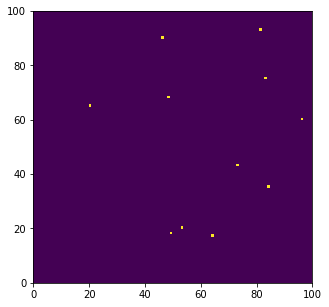

In [43]:
fig = plt.figure(figsize=[5,5])

plt.pcolormesh(array)

plt.show();